# Nautilus Benchmark Analysis

## Introduction

Welcome to the Nautilus Benchmark Analysis Notebook. This notebook is designed to analyze and visualize performance data collected from the **Nautilus** project’s benchmarking suite. The benchmarks cover various aspects of the system, including **key storage performance, mDNS service efficiency, and network latency**.

By leveraging Python's powerful data analysis libraries, we aim to extract meaningful insights from the collected data.

## Tools and Libraries

To facilitate this analysis, we will utilize the following libraries:

- **Pandas** for data manipulation and processing.
- **Matplotlib & Seaborn** for data visualization and trend analysis.
- **NumPy** for numerical computations.

Before proceeding, ensure all required dependencies are installed:

```bash
pip install pandas matplotlib seaborn numpy
```


In [1]:
# Python Imports
import pandas as pd        
import seaborn as sns      
import matplotlib.pyplot as plt 

In [2]:
# PKI Benchmark Files
pki_files = {
    "keypair_generation": pd.read_csv("keypair_generation.csv"),
    "pki_serialization": pd.read_csv("pki_serialization_benchmark.csv"),
    "pki_throughput": pd.read_csv("pki_throughput_benchmark.csv"),
    "pki_verify_sign": pd.read_csv("pki_verify_sign_benchmark.csv")
}

In [3]:
for name, df in pki_files.items():
    print(f"\nDataset: {name}")
    print("=" * (len(name) + 10))

    # Display dataframe info
    print("DataFrame Info:")
    df.info()

    # Display column names and their data types
    print("\nColumn Names and Data Types:")
    print(df.dtypes)

    # Print a separator for better readability
    print("\n" + "-" * 50)


Dataset: keypair_generation
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SetNo         700 non-null    int64 
 1   Iteration     700 non-null    int64 
 2   Algorithm     700 non-null    object
 3   Time_ns       700 non-null    int64 
 4   Memory_Usage  700 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 27.5+ KB

Column Names and Data Types:
SetNo            int64
Iteration        int64
Algorithm       object
Time_ns          int64
Memory_Usage     int64
dtype: object

--------------------------------------------------

Dataset: pki_serialization
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SetNo               600 non-null    int64 
 1 

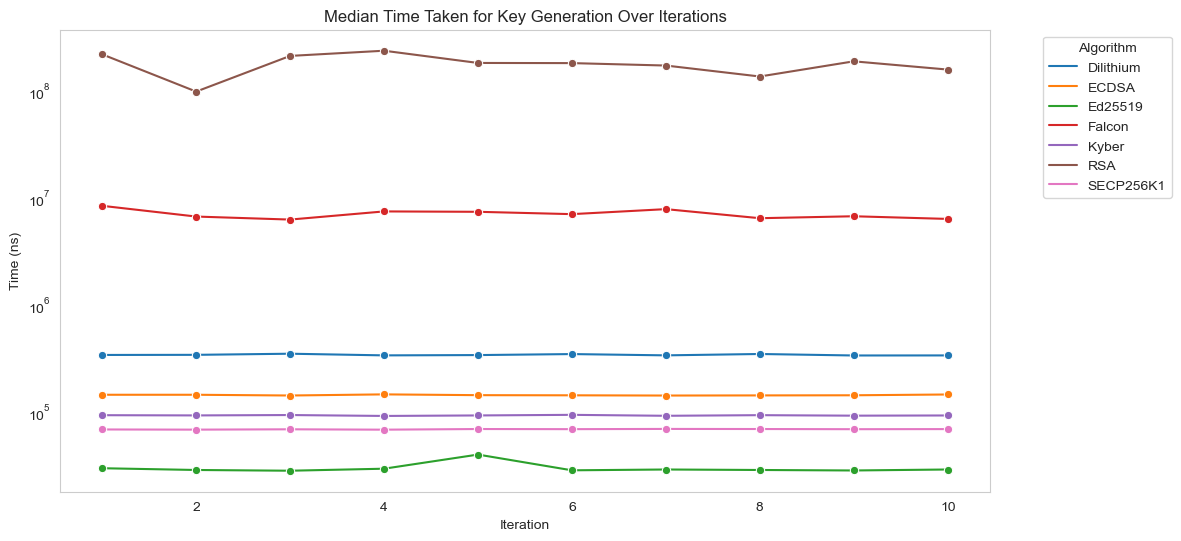

In [4]:
df = pki_files["keypair_generation"]

# Calculate median values across all sets for each Algorithm and Iteration
median_df = df.groupby(['Algorithm', 'Iteration']).median().reset_index()

# Set style for better visualization
sns.set_style("whitegrid")

# Plot Median Time Taken for Key Generation Over Iterations
plt.figure(figsize=(12, 6))
sns.lineplot(data=median_df, x='Iteration', y='Time_ns', hue='Algorithm', marker='o')
plt.title('Median Time Taken for Key Generation Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Time (ns)')
plt.yscale('log')
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()



AttributeError: 'PairGrid' object has no attribute 'set_axis_labels'

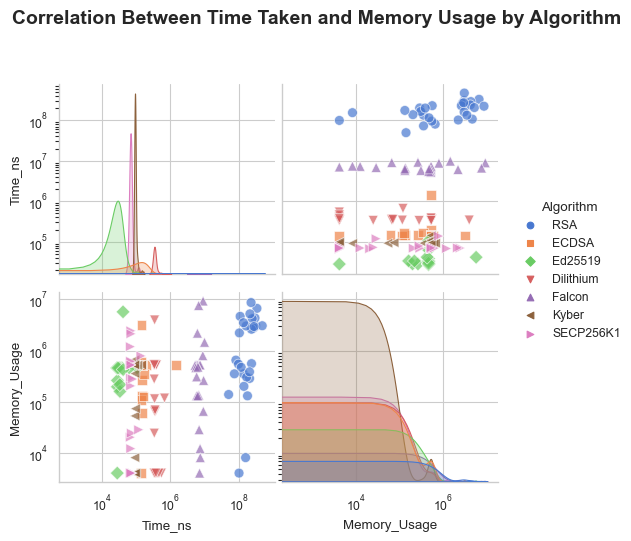

In [5]:

# Ensure numeric data types for accuracy
df['Time_ns'] = pd.to_numeric(df['Time_ns'], errors='coerce')
df['Memory_Usage'] = pd.to_numeric(df['Memory_Usage'], errors='coerce')
df_cleaned = df.dropna(subset=['Time_ns', 'Memory_Usage'])

# Set a publication-friendly style
sns.set_theme(style="whitegrid", context="paper")

# Create a refined pairplot for correlation analysis
g = sns.pairplot(
    df_cleaned,
    hue='Algorithm',
    vars=['Time_ns', 'Memory_Usage'],
    palette='muted',
    diag_kind='kde',
    plot_kws={'alpha': 0.7, 's': 50},  # Adjust point transparency and size
    markers=["o", "s", "D", "v", "^", "<", ">"]
)

# Customize plot appearance for publication
g.fig.suptitle('Correlation Between Time Taken and Memory Usage by Algorithm', y=1.05, fontsize=14, fontweight='bold')
g.fig.subplots_adjust(top=0.9)  # Adjust title position

# Improve axis labels
g.set(xscale="log", yscale="log")
g.set_axis_labels("Time (ns)", "Memory Usage (bytes)", fontsize=12)

# Customize legend position and font size
g._legend.set_bbox_to_anchor((1.02, 1))
g._legend.set_title("Algorithm")
for text in g._legend.texts:
    text.set_fontsize(10)

# Save high-quality output for research paper
# plt.savefig("correlation_analysis.png", dpi=300, bbox_inches='tight')

# Show the refined plot
plt.show()

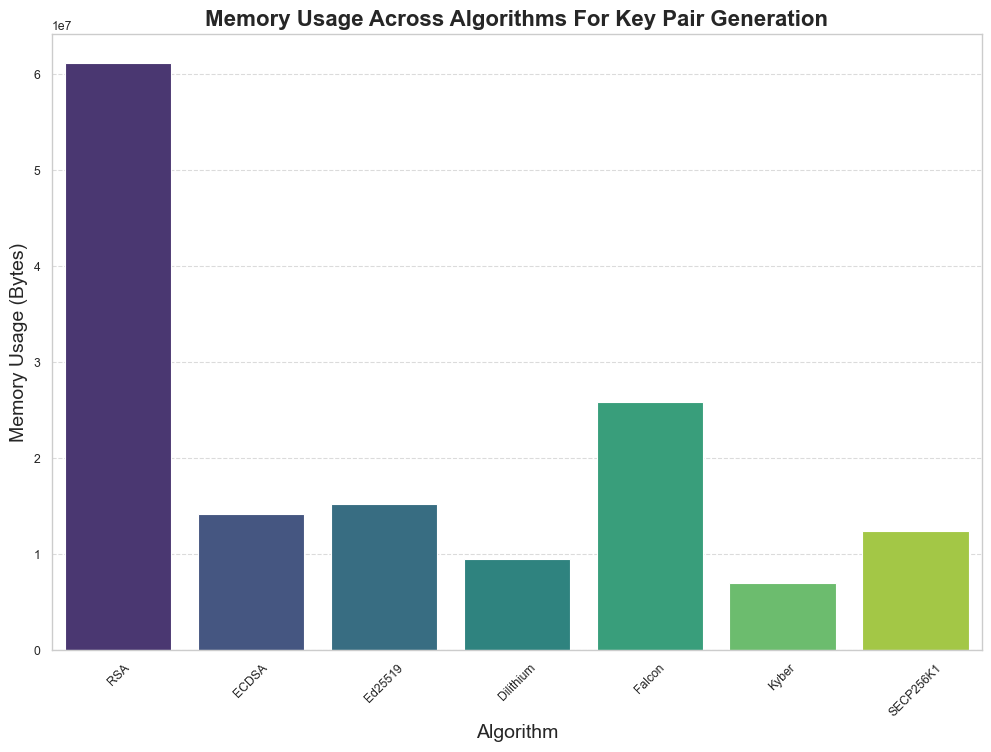

In [12]:
# Create a bar plot to compare memory usage across different algorithms
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df,
    x='Algorithm',
    y='Memory_Usage',
    estimator=sum,
    ci=None,
    palette='viridis'
)

# Customize plot aesthetics
plt.title('Memory Usage Across Algorithms For Key Pair Generation', fontsize=16, fontweight='bold')
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Memory Usage (Bytes)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

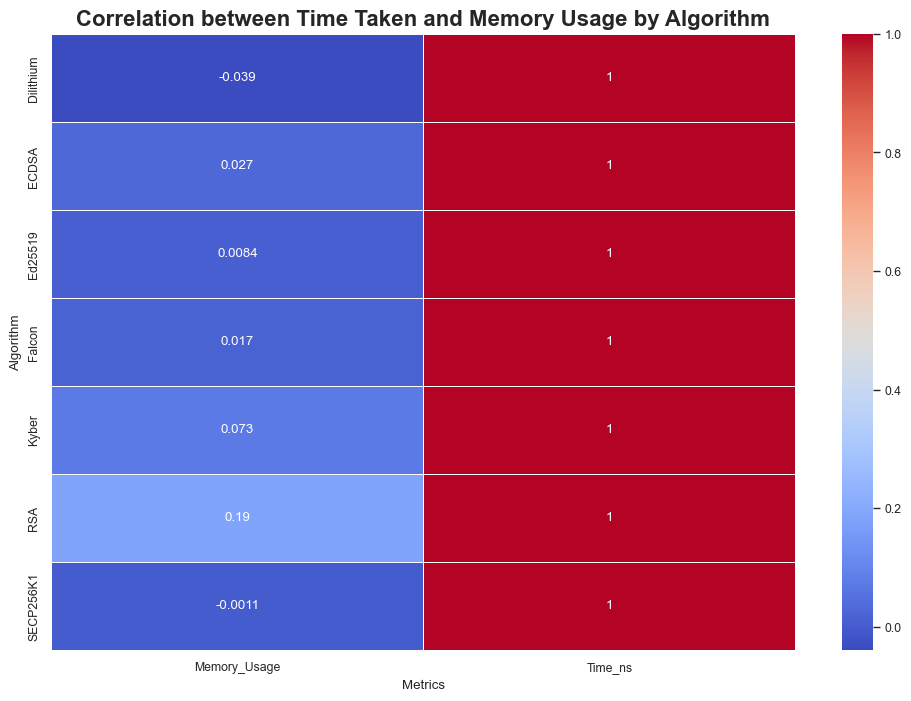

In [7]:
# Create a meaningful heatmap showing correlation between memory usage and time taken grouped by Algorithm
plt.figure(figsize=(12, 8))
corr_matrix = df_cleaned.groupby('Algorithm')[['Time_ns', 'Memory_Usage']].corr().reset_index()
corr_matrix = corr_matrix.pivot(index='Algorithm', columns='level_1', values='Time_ns')
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)

# Customize heatmap aesthetics
plt.title('Correlation between Time Taken and Memory Usage by Algorithm', fontsize=16, fontweight='bold')
plt.xlabel('Metrics')
plt.ylabel('Algorithm')
plt.show()

In [8]:
df_serial = pki_files["pki_serialization"]

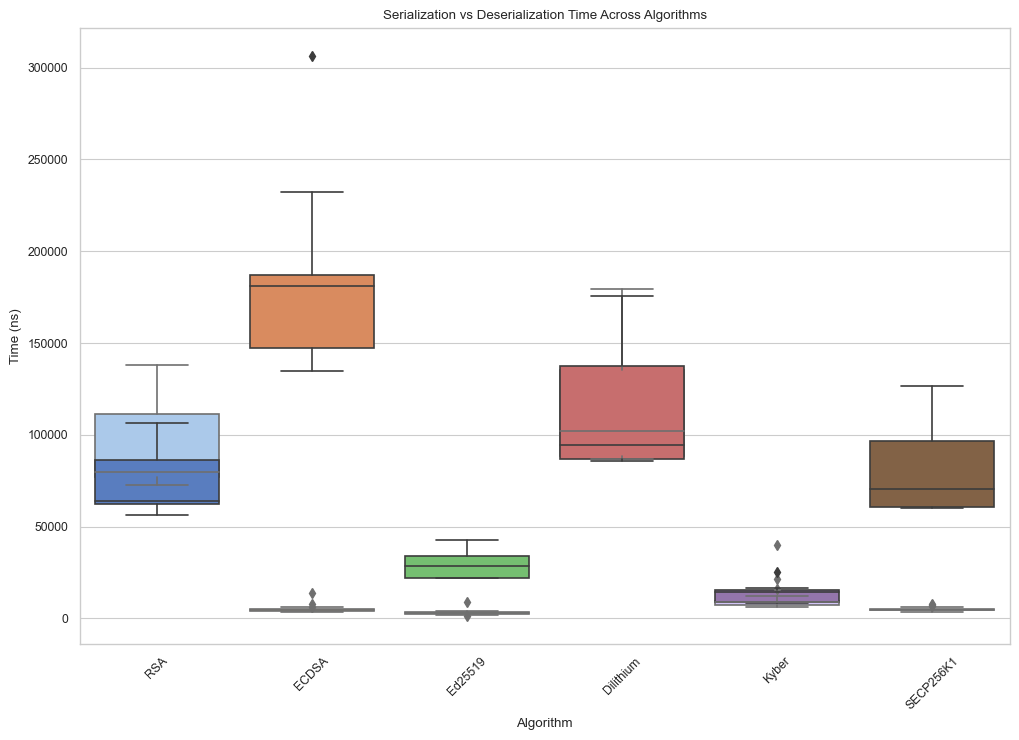

In [9]:
# Segment 1: Serialization vs Deserialization time comparison
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df_serial,
    x='Algorithm',
    y='SerializeTime_ns',
    palette='pastel'
)
sns.boxplot(
    data=df_serial,
    x='Algorithm',
    y='DeserializeTime_ns',
    palette='muted'
)
plt.title('Serialization vs Deserialization Time Across Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Time (ns)')
plt.xticks(rotation=45)
plt.show()

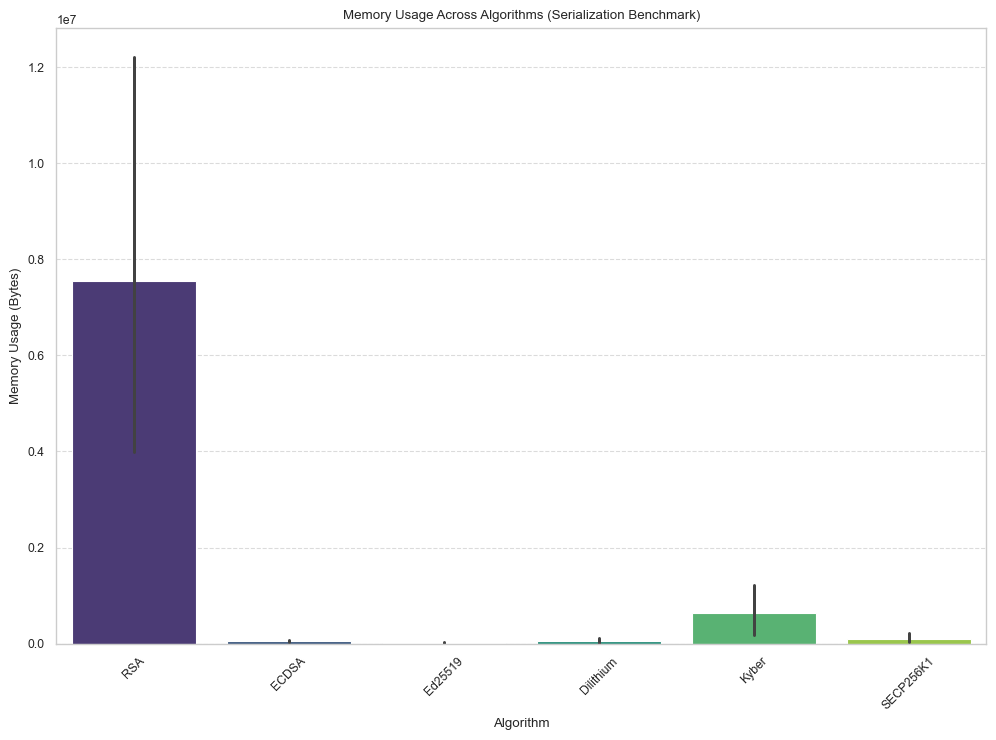

In [10]:
# Segment 2: Memory usage across algorithms
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_serial,
    x='Algorithm',
    y='Memory_Usage',
    palette='viridis'
)
plt.title('Memory Usage Across Algorithms (Serialization Benchmark)')
plt.xlabel('Algorithm')
plt.ylabel('Memory Usage (Bytes)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

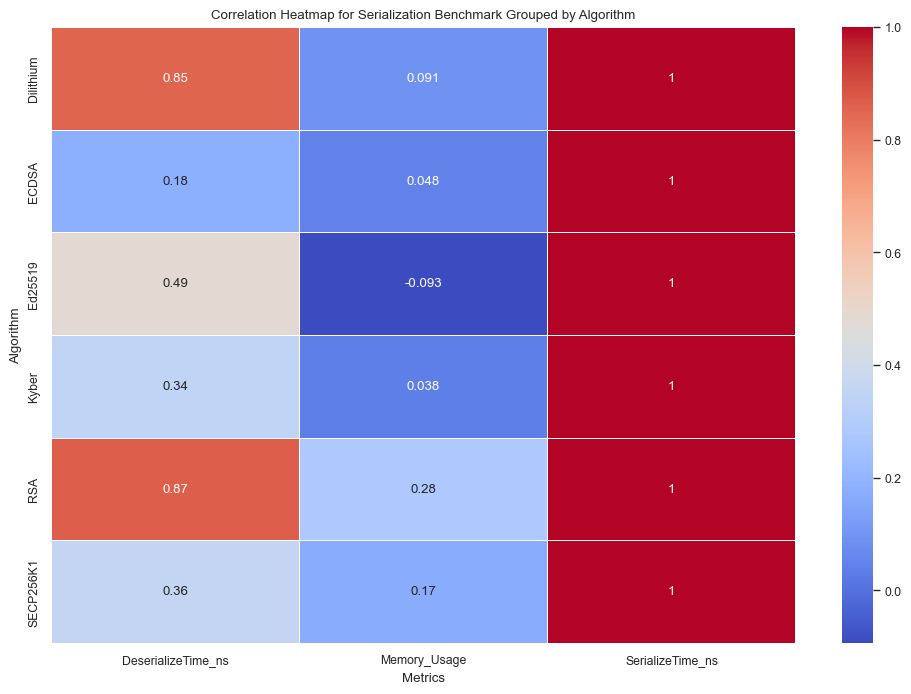

In [11]:

plt.figure(figsize=(12, 8))
corr_matrix_serial = df_serial.groupby('Algorithm')[['SerializeTime_ns', 'DeserializeTime_ns', 'Memory_Usage']].corr().reset_index()
corr_matrix_serial = corr_matrix_serial.pivot(index='Algorithm', columns='level_1', values='SerializeTime_ns')
sns.heatmap(
    corr_matrix_serial,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Correlation Heatmap for Serialization Benchmark Grouped by Algorithm')
plt.xlabel('Metrics')
plt.ylabel('Algorithm')
plt.show()

